In [3]:
# Importing libraries
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")

In [4]:
# Importing the dataset
df = pd.read_csv('C:/Users/tejas/Downloads/Traffic_Violations.csv', low_memory=False)
# Giving the dimension information
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# Giving some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
# tab_info = pd.concat([tab_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])
# tab_info=tab_info.concat(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
#                          .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (1901234, 43)


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
column type,object,object,object,object,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,bool,object,object,object,object,object,object,object


In [5]:

# Let's see what we have
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,345bbc5d-d407-45b4-a51f-2b4adacf9622,11/08/2023,08:44:00,MCP,"3rd District, Silver Spring",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,BOARDBRICH DR @ BOURNFIELD WAY,39.055453,-76.960461,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2018.0,CHEVY,IMPALA,BEIGE,Citation,16-112(c),Transportation Article,False,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.055453, -76.960461)"
1,9ad17d0d-6783-445a-88ef-fb452e4385c6,11/08/2023,21:30:00,MCP,"2nd District, Bethesda",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,GEORGIA AVE / CONNECTICUT AVE,39.083935,-77.077504,No,No,No,No,No,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,TOYOTA,AVALON,WHITE,Citation,16-101(a1),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,XX,B - Unmarked Patrol,"(39.0839346666667, -77.077504)"
2,9ad17d0d-6783-445a-88ef-fb452e4385c6,11/08/2023,21:30:00,MCP,"2nd District, Bethesda",DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...,GEORGIA AVE / CONNECTICUT AVE,39.083935,-77.077504,No,No,No,No,No,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,TOYOTA,AVALON,WHITE,Citation,21-402(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,XX,B - Unmarked Patrol,"(39.0839346666667, -77.077504)"
3,9ad17d0d-6783-445a-88ef-fb452e4385c6,11/08/2023,21:30:00,MCP,"2nd District, Bethesda",KNOWINGLY DRIVING UNINSURED VEHICLE,GEORGIA AVE / CONNECTICUT AVE,39.083935,-77.077504,No,No,No,No,No,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,TOYOTA,AVALON,WHITE,Citation,17-107(a1),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,XX,B - Unmarked Patrol,"(39.0839346666667, -77.077504)"
4,4afdfba3-2023-4bd5-b4d5-3d5875c9e97e,11/07/2023,09:52:00,MCP,"4th District, Wheaton",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 88 MPH I...,I270/WATKINS MILL ROAD,39.118305,-77.195678,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2007.0,SUBARU,OUTBACK,WHITE,Citation,21-801.1,Transportation Article,False,WHITE,F,MKIDDLETOWN,MD,MD,A - Marked Patrol,"(39.1183055, -77.1956775)"


In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            721444
Search Disposition         1816269
Search Outcome              740712
Search Reason              1816269
Search Reason For Stop      721722
Search Type                1816277
Search Arrest Reason       1842993
State                           59
VehicleType                      0
Year                

In [20]:
# Check for outliers in the 'Latitude' column
latitude_outliers = df[(df['Latitude'] < -90) | (df['Latitude'] > 90)]

# Check for outliers in the 'Longitude' column
longitude_outliers = df[(df['Longitude'] < -180) | (df['Longitude'] > 180)]

# Print the outliers
print("Latitude outliers:")
print(latitude_outliers)

print("\nLongitude outliers:")
print(longitude_outliers)

Latitude outliers:
Empty DataFrame
Columns: [SeqID, Date Of Stop, Time Of Stop, Agency, SubAgency, Description, Location, Latitude, Longitude, Accident, Belts, Personal Injury, Property Damage, Fatal, Commercial License, HAZMAT, Commercial Vehicle, Alcohol, Work Zone, Search Conducted, Search Disposition, Search Outcome, Search Reason, Search Reason For Stop, Search Type, Search Arrest Reason, State, VehicleType, Year, Make, Model, Color, Violation Type, Charge, Article, Contributed To Accident, Race, Gender, Driver City, Driver State, DL State, Arrest Type, Geolocation]
Index: []

Longitude outliers:
Empty DataFrame
Columns: [SeqID, Date Of Stop, Time Of Stop, Agency, SubAgency, Description, Location, Latitude, Longitude, Accident, Belts, Personal Injury, Property Damage, Fatal, Commercial License, HAZMAT, Commercial Vehicle, Alcohol, Work Zone, Search Conducted, Search Disposition, Search Outcome, Search Reason, Search Reason For Stop, Search Type, Search Arrest Reason, State, Vehicl

In [21]:
# Check unique values in the 'Accident' column
unique_accidents = df['Accident'].unique()
print("Unique values in the 'Accident' column:")
print(unique_accidents)


Unique values in the 'Accident' column:
['No' 'Yes']


In [7]:
# Counting the violations by State
df = df[df.State.notnull()]
aggResult = df.groupby(by=['State'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult.reset_index()
aggResult.head(20)

,State,Count
0,MD,1652242
1,VA,87657
2,DC,47899
3,XX,14848
4,PA,13345
5,TX,9510
6,FL,9113
7,WV,7824
8,NC,6996
9,NY,6105


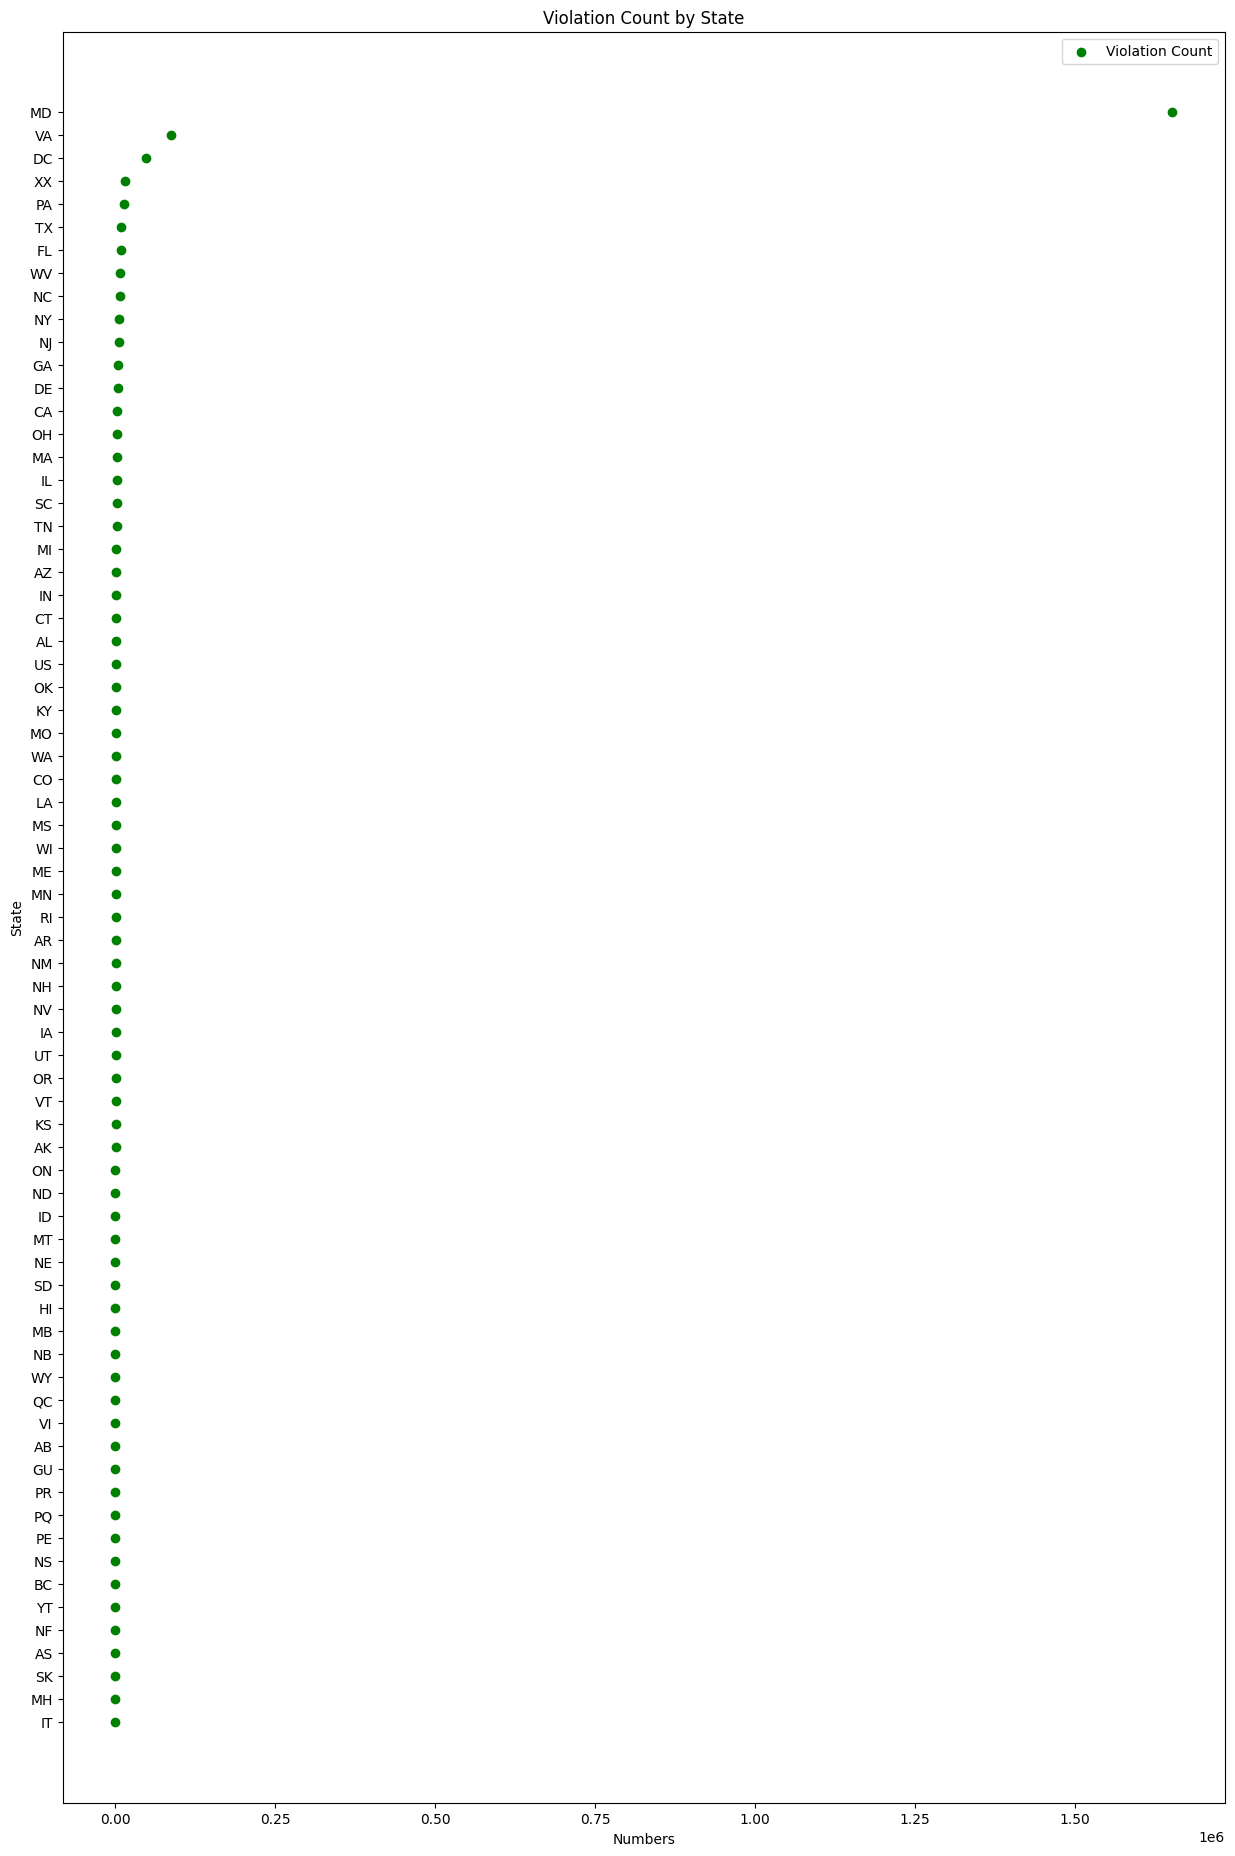

In [8]:
# Visualizing the result
fig = plt.figure(figsize=(15,23))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index #swap high and low
labels = aggResult['State']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Numbers')
plt.ylabel('State')
plt.title('Violation Count by State')
plt.legend()
plt.show()

In [9]:
# Counting the violations by Maker
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Make'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >500]
aggResult = aggResult.reset_index()
aggResult.head(20)

,Make,Count
0,HONDA,7531
1,TOYOTA,6654
2,FORD,5798
3,NISSAN,3859
4,CHEVROLET,2303
5,DODGE,2052
6,ACURA,1795
7,CHEVY,1673
8,TOYT,1626
9,JEEP,1501


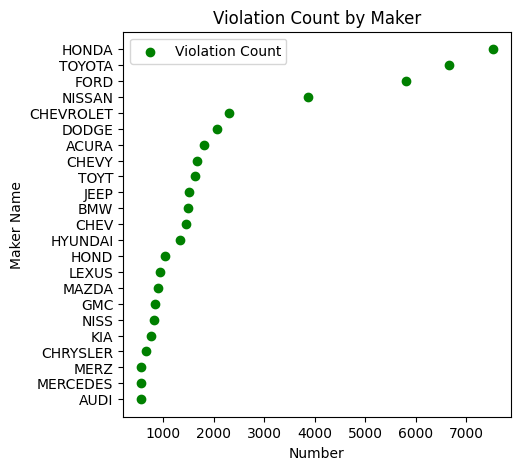

In [10]:

# Visualization the result
fig = plt.figure(figsize=(5,5))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index 
labels = aggResult['Make']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Maker Name')
plt.title('Violation Count by Maker')
plt.legend()
plt.show()

In [11]:
# Counting the violations by Model
aggResult = df.groupby(by=['Model'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >1000]
aggResult = aggResult.reset_index()
aggResult.head(20)

,Model,Count
0,4S,3676
1,CIVIC,3028
2,ACCORD,2712
3,CAMRY,1908
4,COROLLA,1832
5,ALTIMA,1615
6,TK,1569
7,4D,1024


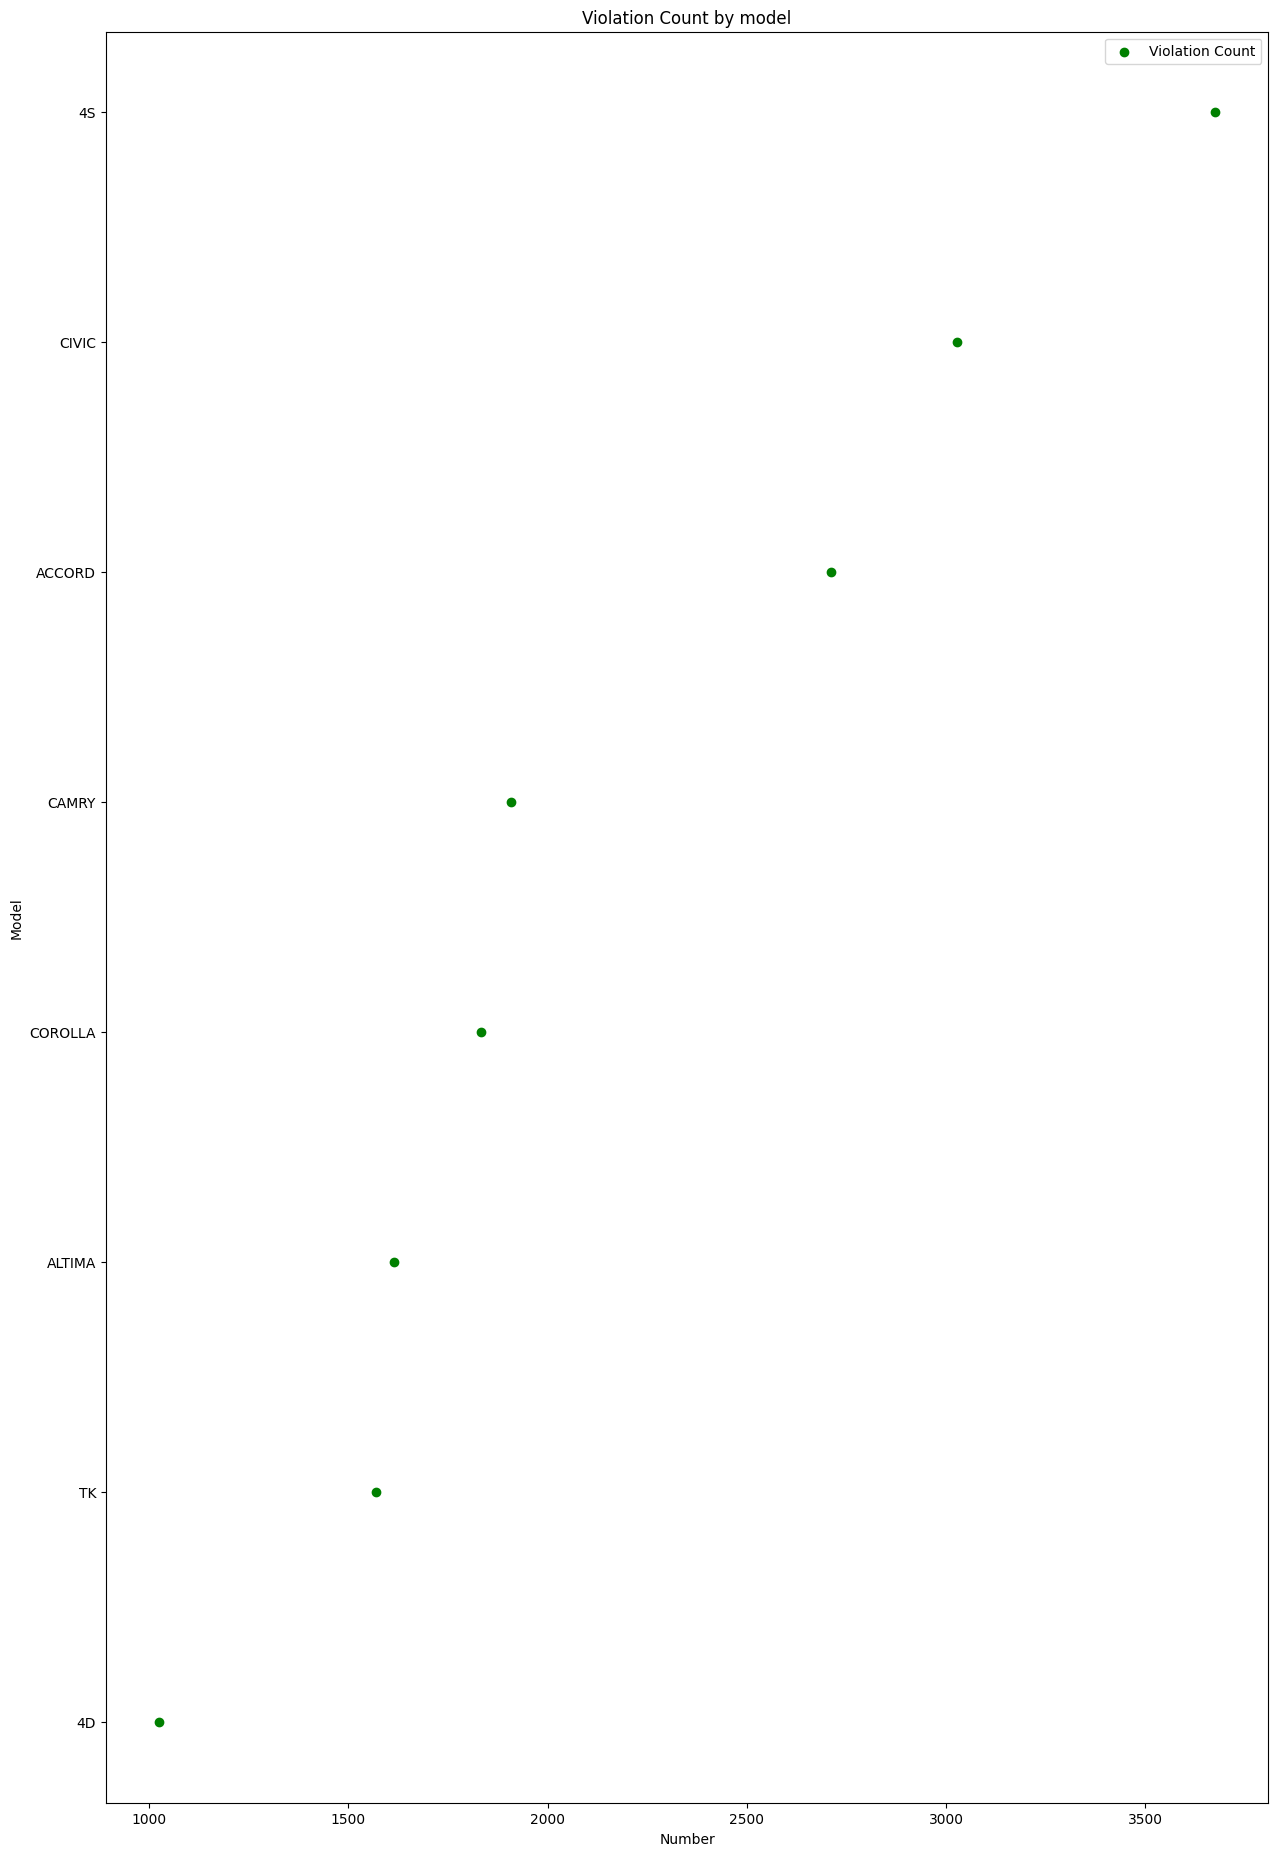

In [12]:
# Visualization the results
fig = plt.figure(figsize=(15,23))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index
labels = aggResult['Model']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Model')
plt.title('Violation Count by model')
plt.legend()
plt.show()

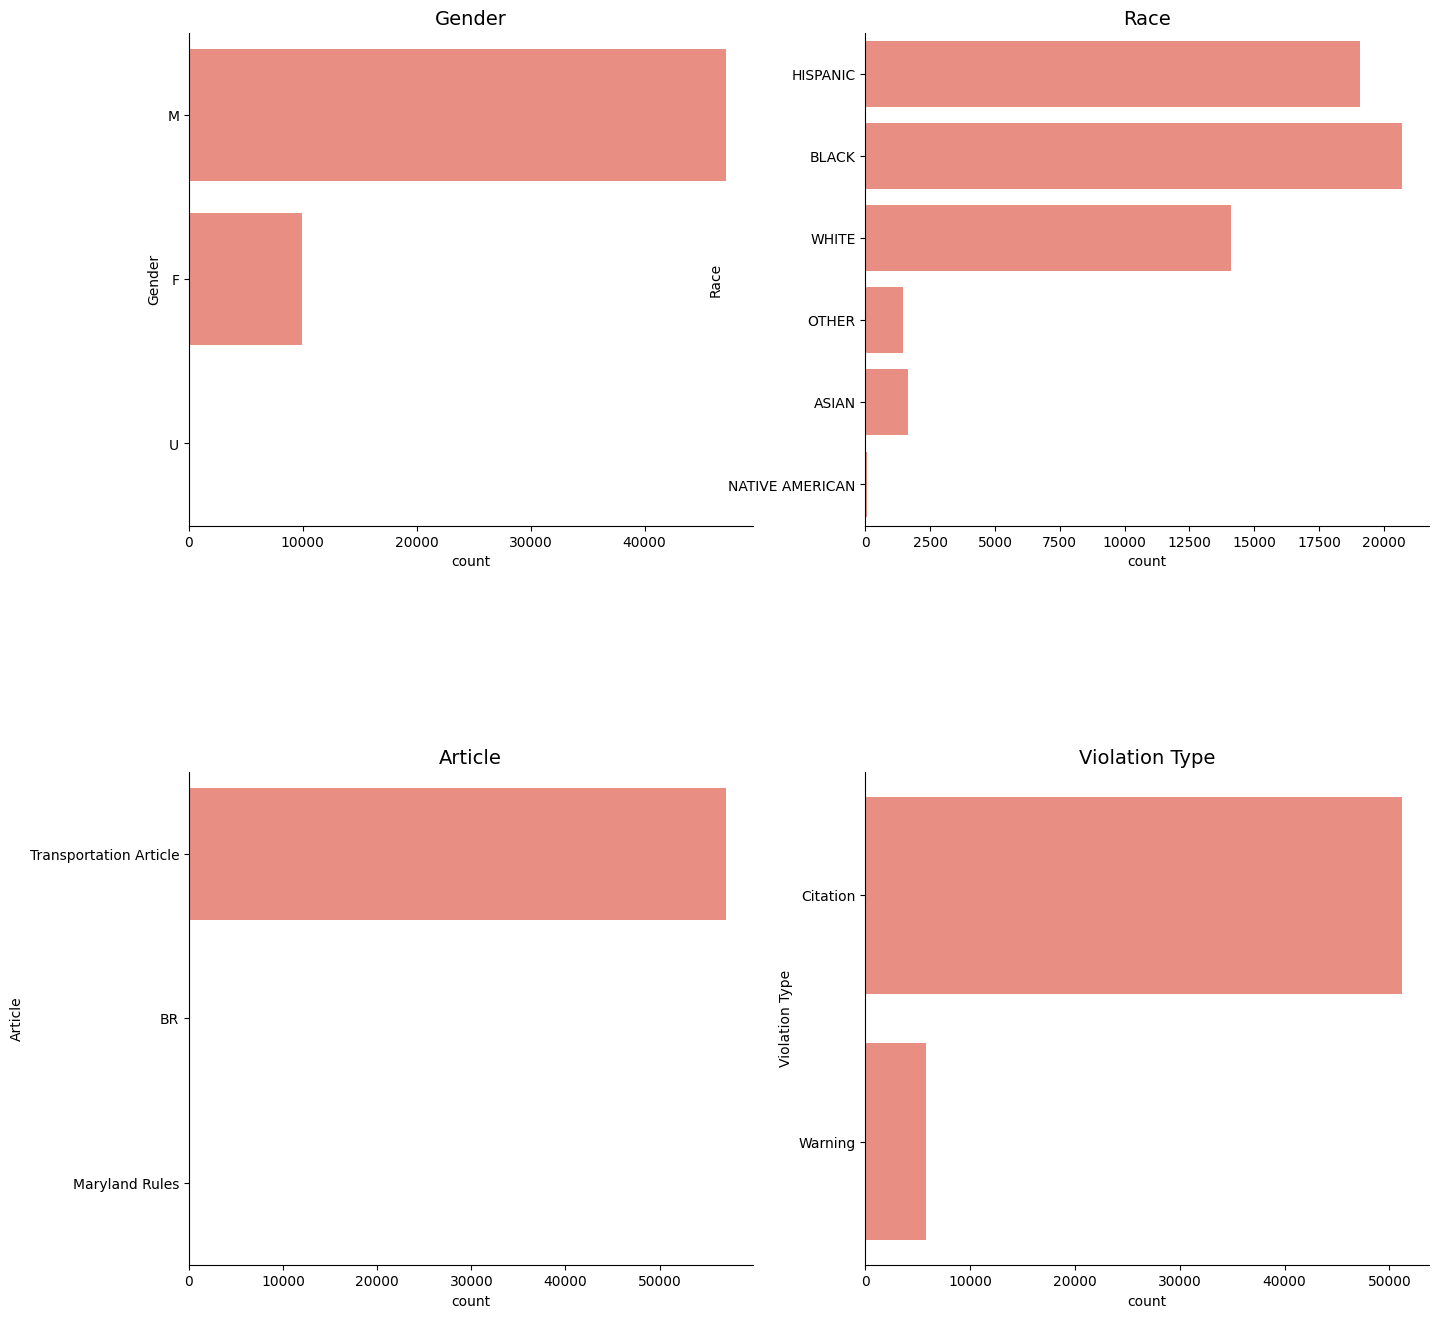

In [13]:
#Violation Kinds

f, axarr = plt.subplots(2, 2, figsize=(16, 16))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Gender'], ax=axarr[0][0], color='salmon')
axarr[0][0].set_title("Gender", fontsize=14)

sns.countplot(df['Race'], ax=axarr[0][1], color='salmon')
axarr[0][1].set_title("Race", fontsize=14)

sns.countplot(df['Article'], ax=axarr[1][0], color='salmon')
axarr[1][0].set_title("Article", fontsize=14)

sns.countplot(df['Violation Type'], ax=axarr[1][1], color='salmon')
axarr[1][1].set_title("Violation Type", fontsize=14)

sns.despine()

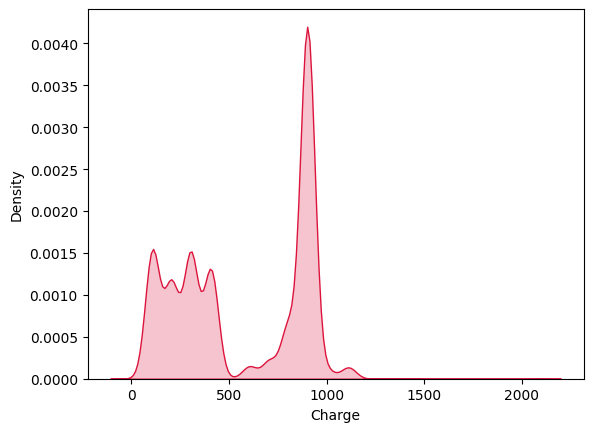

In [14]:
# Let's see the Charge distribution
df['Charge'] = df['Charge'].apply(lambda x: re.findall(r"\d+\.?\d*", x)[1]).astype(float)
kde_kwargs = {'color': 'crimson', 'shade': True}
vis1 = sns.kdeplot(df['Charge'], **kde_kwargs)

Text(0.5, 1.0, 'Fatal')

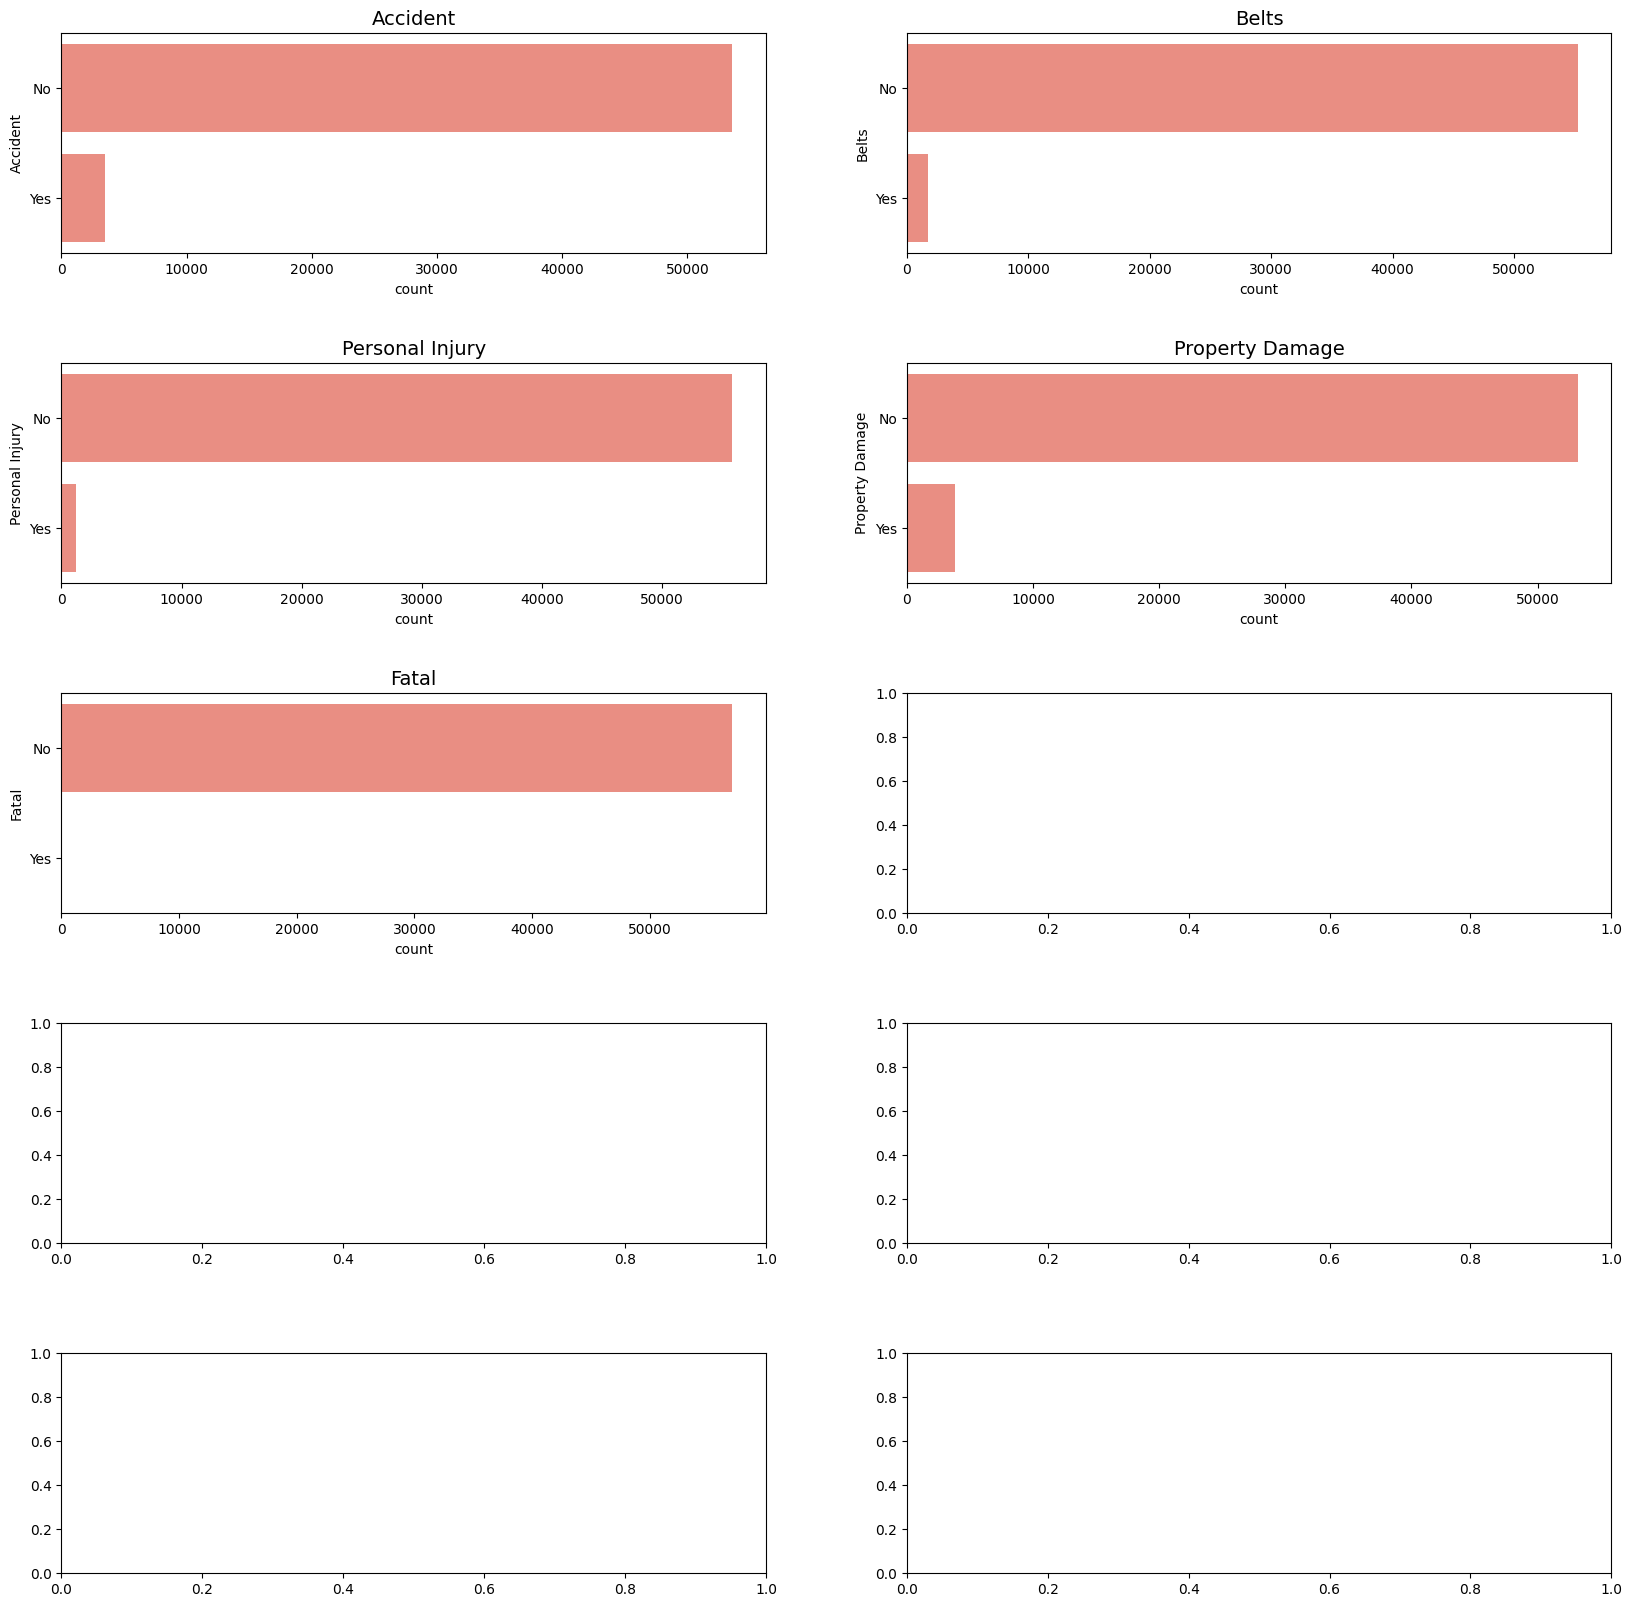

In [15]:
# Let's see the violations kinds
f, axarr = plt.subplots(5, 2, figsize=(20, 20))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Accident'], ax=axarr[0][0], color='salmon')
axarr[0][0].set_title("Accident", fontsize=14)

sns.countplot(df['Belts'], ax=axarr[0][1], color='salmon')
axarr[0][1].set_title("Belts", fontsize=14)

sns.countplot(df['Personal Injury'], ax=axarr[1][0], color='salmon')
axarr[1][0].set_title("Personal Injury", fontsize=14)

sns.countplot(df['Property Damage'], ax=axarr[1][1], color='salmon')
axarr[1][1].set_title("Property Damage", fontsize=14)

sns.countplot(df['Fatal'], ax=axarr[2][0], color='salmon')
axarr[2][0].set_title("Fatal", fontsize=14)


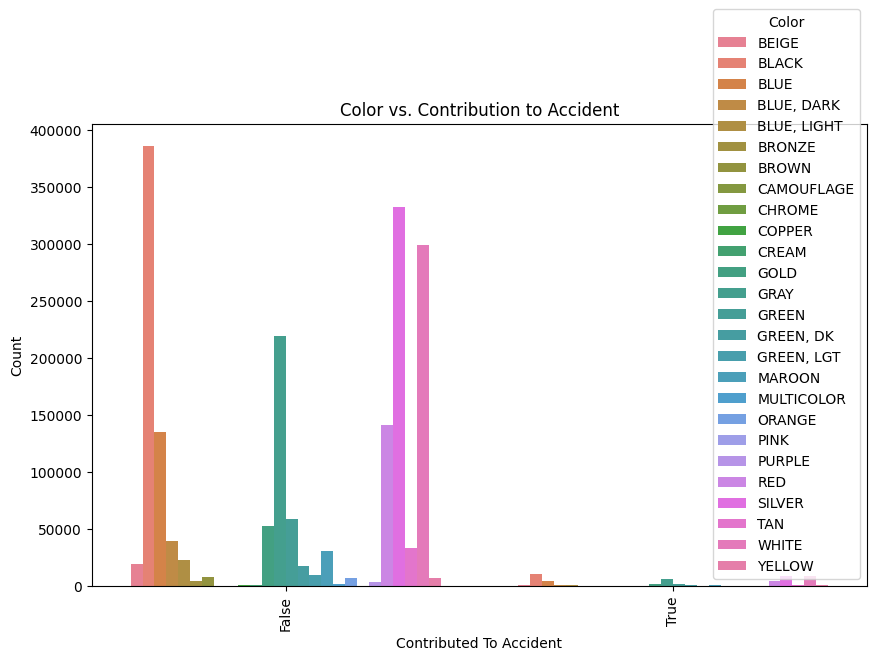

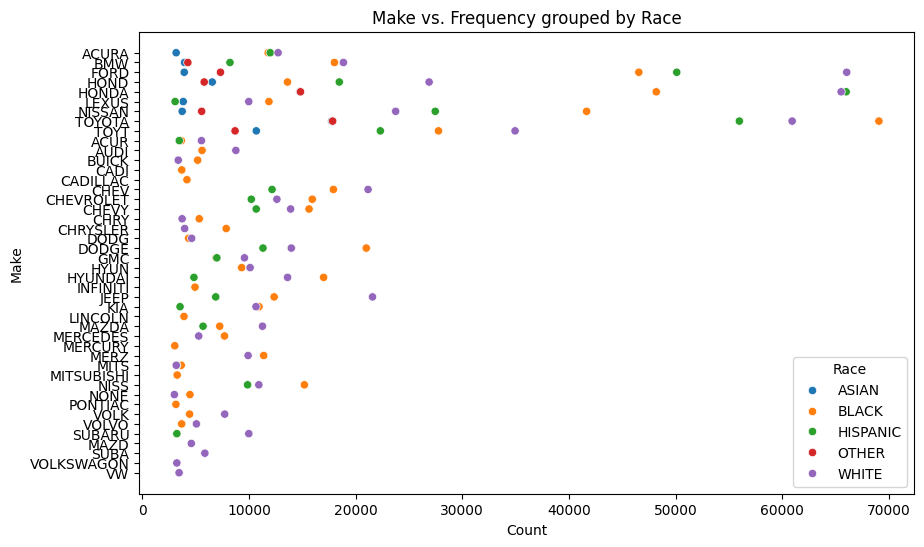

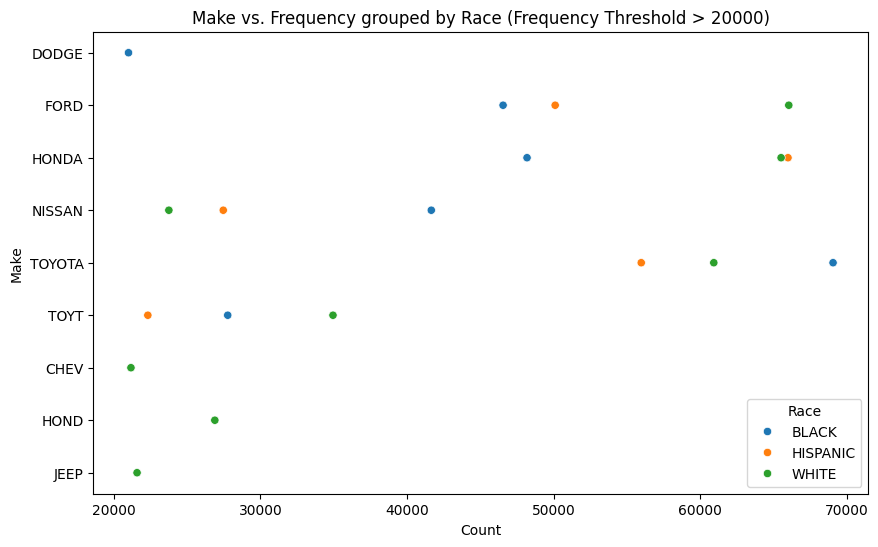

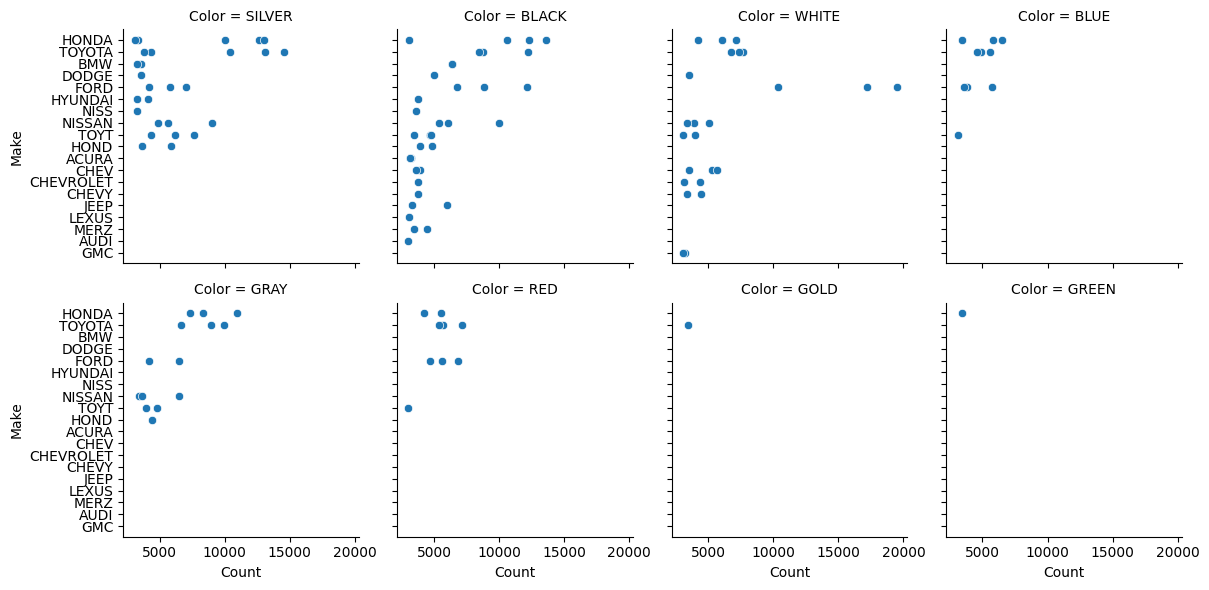

In [16]:
# Load data
TrafficViolation = pd.read_csv('C:/Users/tejas/Downloads/Traffic_Violations.csv')

# Count violations by Race and Make
RaceModel = TrafficViolation.groupby(['Race', 'Make']).size().reset_index(name='Count')

# Count violations by Contribution to accident and Color
ColourViolation = TrafficViolation.groupby(['Contributed To Accident', 'Color']).size().reset_index(name='Count')

# Plot Color vs. Contribution to Accident
plt.figure(figsize=(10, 6))
sns.barplot(data=ColourViolation, x='Contributed To Accident', y='Count', hue='Color')
plt.xticks(rotation=90)
plt.title('Color vs. Contribution to Accident')
plt.show()

# Plot Make vs. Frequency grouped by Race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RaceModel[RaceModel['Count'] > 3000], x='Count', y='Make', hue='Race')
plt.title('Make vs. Frequency grouped by Race')
plt.show()

# Plot Make vs. Frequency grouped by Race with frequency threshold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RaceModel[RaceModel['Count'] > 20000], x='Count', y='Make', hue='Race')
plt.title('Make vs. Frequency grouped by Race (Frequency Threshold > 20000)')
plt.show()

# Count violations by Race, Make, and Color
RaceModelColor = TrafficViolation.groupby(['Race', 'Make', 'Color']).size().reset_index(name='Count')

# Plot Make vs. Frequency grouped by Race and Color
g = sns.FacetGrid(data=RaceModelColor[RaceModelColor['Count'] > 3000], col='Color', col_wrap=4)
g.map(sns.scatterplot, 'Count', 'Make')
g.add_legend()
plt.show()





In [17]:
print(RaceModelColor.head())
print(RaceModelColor.info())


    Race             Make       Color  Count
0  ASIAN  1VWBP7A37DC1265      SILVER      1
1  ASIAN             2013       WHITE      1
2  ASIAN             2016  BLUE, DARK     14
3  ASIAN             2019        BLUE      1
4  ASIAN  2T3P1RFV9LW1182       BLACK      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23776 entries, 0 to 23775
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Race    23776 non-null  object
 1   Make    23776 non-null  object
 2   Color   23776 non-null  object
 3   Count   23776 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 743.1+ KB
None


In [18]:
print(RaceModelColor['Race'].unique())


['ASIAN' 'BLACK' 'HISPANIC' 'NATIVE AMERICAN' 'OTHER' 'WHITE']


In [19]:
# Count violations by Race, Make, and Color
RaceModelColor = TrafficViolation.groupby(['Race', 'Make', 'Color']).size().reset_index(name='Count')

# Display the result
print(RaceModelColor)  


        Race             Make        Color  Count
0      ASIAN  1VWBP7A37DC1265       SILVER      1
1      ASIAN             2013        WHITE      1
2      ASIAN             2016   BLUE, DARK     14
3      ASIAN             2019         BLUE      1
4      ASIAN  2T3P1RFV9LW1182        BLACK      2
...      ...              ...          ...    ...
23771  WHITE             ZHNG          RED      1
23772  WHITE             ZNEN       SILVER      4
23773  WHITE             ZUMA  BLUE, LIGHT      6
23774  WHITE          ZUMMERQ        GREEN      4
23775  WHITE           ]LEXUS       SILVER      1

[23776 rows x 4 columns]
